## Introdução

O objetivo deste projeto é responder qual é a taxa de admição em uma pós graduação, em uma universidade americana, em função da pontuação de uma série de teste e estatísticas acadêmicas por meio de métodos preditivos de regressão.

- **TOEFL**: Nota no exame de proficiência na língua inglesa
- **GRE**: Nota no Exame de Registro de Graduação
- **CGPA**: Valor do desempenho acadêmico ao longo de um determinado período de estudos, em geral, Ensino Médio ou Graduação
- **Rank da Universidade**: Prestígio da universidade ranqueado de 1 a 5
- **Statement of Purpose (SOP)**: Declaração pessoal de propósito que cita a razão de um candidato querer ingressar em uma universidade
- **Letter of Recommendation**: Carta de recomendação 
- **Research**: Indivíduo já fez alguma pesquisa de cunho acadêmico

In [31]:
#Importações

%matplotlib notebook

import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import norm, probplot
import statsmodels.api as sm
import matplotlib.pyplot as plt

#Regressão Linear
from sklearn import datasets, svm
from sklearn.linear_model import LinearRegression

#Regression Tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

#Importações para as predições
from sklearn.model_selection import train_test_split
from sklearn import metrics

#Melhora a visualização
from IPython.display import display

In [32]:
#Função para Regressão
#Faz a regressão para 
def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results

In [33]:
data = pd.read_csv("Admission_Predict.csv")

## Análise Exploratória

In [34]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [35]:
df = data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit ']]
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [36]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

<IPython.core.display.Javascript object>


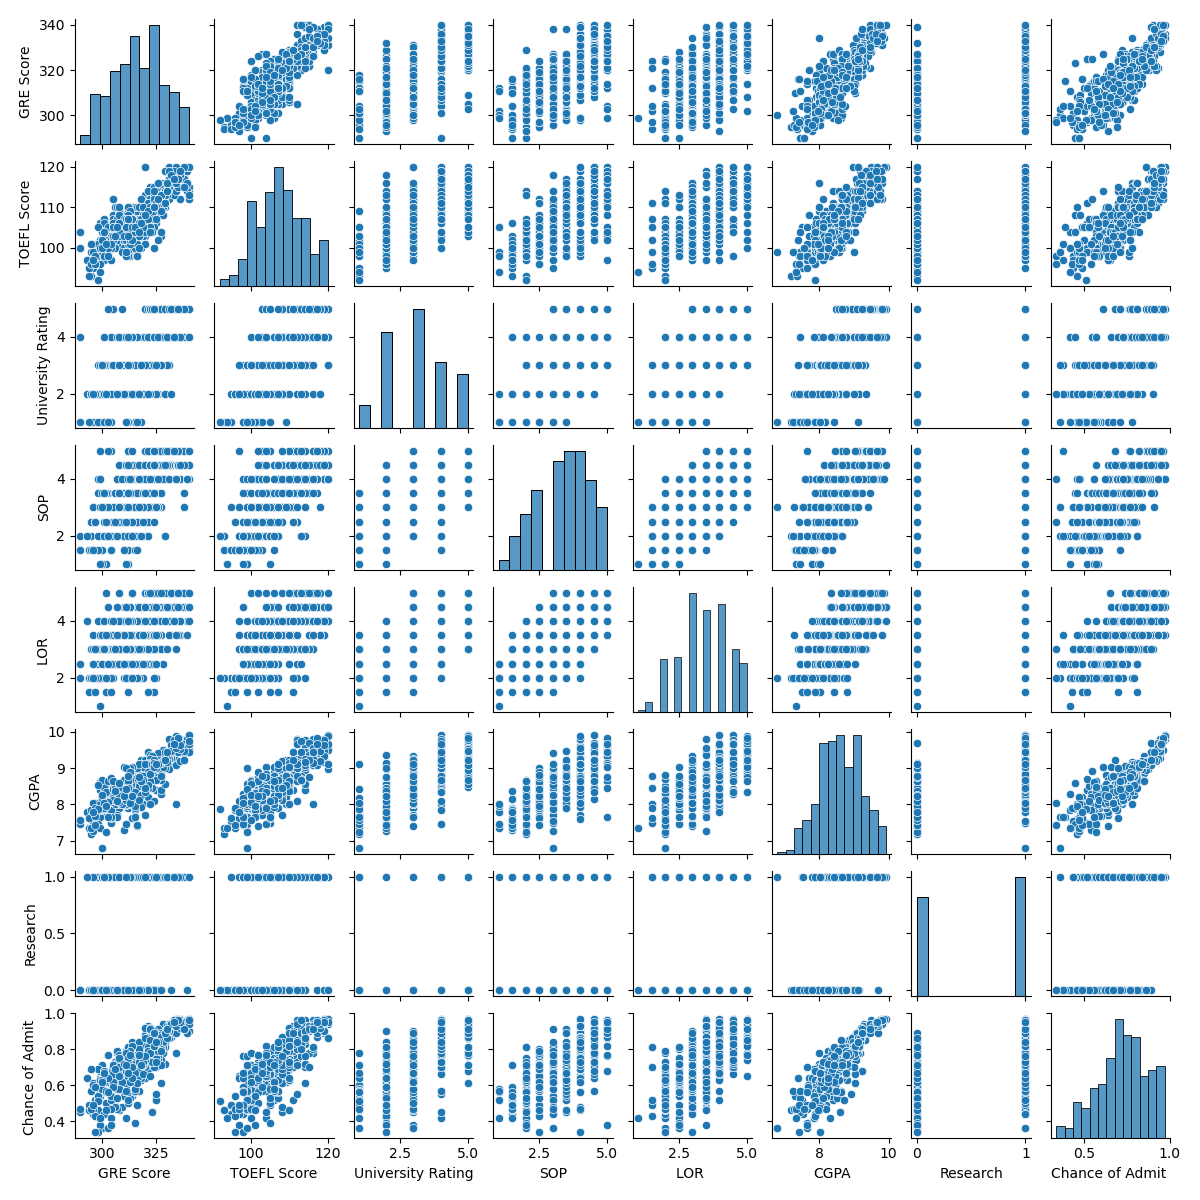

In [37]:
sns.pairplot(df, height = 1.5)

# Regressão Linear

In [45]:
Y = df['Chance of Admit ']
X = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1) 
results = regress(Y_train,X_train)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance of Admit    R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     151.4
Date:                Thu, 02 Jun 2022   Prob (F-statistic):           5.92e-90
Time:                        08:35:20   Log-Likelihood:                 378.69
No. Observations:                 280   AIC:                            -741.4
Df Residuals:                     272   BIC:                            -712.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.0547      0.149     -7.100      0.000      -1.347      -0.762
GRE Score             0.0014      0.001      1.988      0.048    1.36e-05       0.003
TOEFL Score           0.0027      0.001      2.067      0.040       0.000       0.005
University Rating     0.0089      0.006      1.487      0.138      -0.003       0.021
SOP                  -0.0001      0.007     -0.019      0.985      -0.014       0.013
LOR                   0.0210      0.006      3.238      0.001       0.008       0.034
CGPA                  0.1079      0.014      7.444      0.000       0.079       0.136
Research              0.0302      0.010      3.155      0.002       0.011       0.049
==============================================================================
Omnibus:                       68.032   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.011
Skew:                          -1.207   Prob(JB):                     5.35e-32
Kurtosis:                       5.553   Cond. No.                     1.31e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Retirando SOP - Statement of purpose 

Foi tomado como alfa um valor de 5% após observar os valores de P>|t|. Com isso, a primeira variável que foi eliminada foi o SOP, que apresenta na célula anterior um valor de 98,5%. 

In [46]:
    #Retirando a variavel SOP - Statement of purpose
X1 = X_train[['GRE Score', 'TOEFL Score', 'University Rating',
       'LOR ', 'CGPA', 'Research']]
results1 = regress(Y_train,X1)
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance of Admit    R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     177.2
Date:                Thu, 02 Jun 2022   Prob (F-statistic):           4.26e-91
Time:                        08:35:22   Log-Likelihood:                 378.69
No. Observations:                 280   AIC:                            -743.4
Df Residuals:                     273   BIC:                            -717.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.0545      0.148     -7.120      0.000      -1.346      -0.763
GRE Score             0.0014      0.001      2.004      0.046    2.51e-05       0.003
TOEFL Score           0.0027      0.001      2.093      0.037       0.000       0.005
University Rating     0.0089      0.006      1.574      0.117      -0.002       0.020
LOR                   0.0210      0.006      3.505      0.001       0.009       0.033
CGPA                  0.1079      0.014      7.527      0.000       0.080       0.136
Research              0.0302      0.010      3.165      0.002       0.011       0.049
==============================================================================
Omnibus:                       68.041   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.023
Skew:                          -1.207   Prob(JB):                     5.32e-32
Kurtosis:                       5.553   Cond. No.                     1.31e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Com novos valores obtidos notou-se que a variável University Rating também apresentava um valor de alfa de 11,7%, ou seja, superior ao valor que se deseja.

In [47]:
#Retirando a variavel University Rating
X2 = X_train[['GRE Score', 'TOEFL Score',
       'LOR ', 'CGPA', 'Research']]
results2 = regress(Y_train,X2)
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance of Admit    R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     211.0
Date:                Thu, 02 Jun 2022   Prob (F-statistic):           9.52e-92
Time:                        08:35:25   Log-Likelihood:                 377.43
No. Observations:                 280   AIC:                            -742.9
Df Residuals:                     274   BIC:                            -721.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.1376      0.139     -8.197      0.000      -1.411      -0.864
GRE Score       0.0014      0.001      2.018      0.045    3.51e-05       0.003
TOEFL Score     0.0031      0.001      2.520      0.012       0.001       0.006
LOR             0.0247      0.006      4.462      0.000       0.014       0.036
CGPA            0.1129      0.014      8.057      0.000       0.085       0.140
Research        0.0303      0.010      3.163      0.002       0.011       0.049
==============================================================================
Omnibus:                       66.172   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.678
Skew:                          -1.186   Prob(JB):                     2.09e-30
Kurtosis:                       5.467   Cond. No.                     1.23e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Como visto, nenhuma outra variável apresenta valor igual ou superior ao alfa adotado. Desse modo, foi gerado um gráfico comparando os valores ordenados e teóricos para descobrir se é uma distribuição normal.

In [48]:
admit = results2.params[0]
gre = results2.params[1]
toefl = results2.params[2]
lore = results2.params[3]
cgpa = results2.params[4]
rese = results2.params[5]

<IPython.core.display.Javascript object>


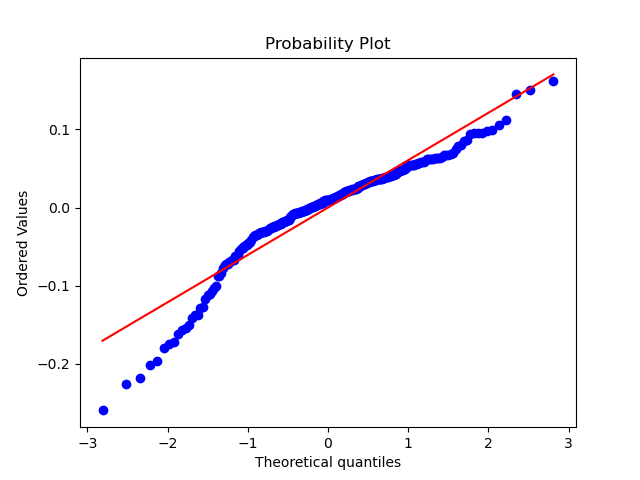

In [49]:
plt.figure()
probplot(results2.resid,dist="norm",plot=plt)
plt.show()

    Contudo, como observado nas extremidades do gráfico nota-se que ele se mantém distante da linha teórica, já no meio 
    aparenta estar um pouco mais condizente com os quantis teóricos.

    Recapitulando as variáveis removidas, o que mais marcou logicamente foi a retirada do University Rating, pois seguindo o raciocínio quanto maior o rank de uma universidade menor deveria ser sua porcentagem de alunos aceitos. No entanto, 
    pelos gráficos pairplot gerados, ao analisar o de University Rating X Chance of Admit, nota-se que este pensamento está aparentemente errado, e que na verdade as universidades de maior rank são as com maiores índices de admissão. 

In [50]:
clf = LinearRegression()
clf.fit(X_train, Y_train)
prediction = clf.predict(X_test) #Y^
RMSE = np.mean((Y_test-prediction)**2)**0.5
print(RMSE)

0.06578381051086298


# Árvore de Decisão

A Árvore de Decisão nada mais é do que um mapa dos possíveis resultados de uma série de escolhas relacionanadas. Ela permite que um indivíduo ou organização compare possíveis ações com base em seus custos, probabilidades, e benefícios. Neste caso, ela será usada para prever a taxa de admição para uma pós graduação em uma universidade americanas separando os fatores que podem ser usados para avaliação, bem como as interferências. 

In [60]:
# Monta a árvore de decisão

Adr = DecisionTreeRegressor(max_depth = 3)
Adr = Adr.fit(X_train, Y_train)

Y_Ar = Adr.predict(X_test)

Após a criação dessa árvore em dados, a mesma foi representada como uma figura para melhor compreenção.

<IPython.core.display.Javascript object>


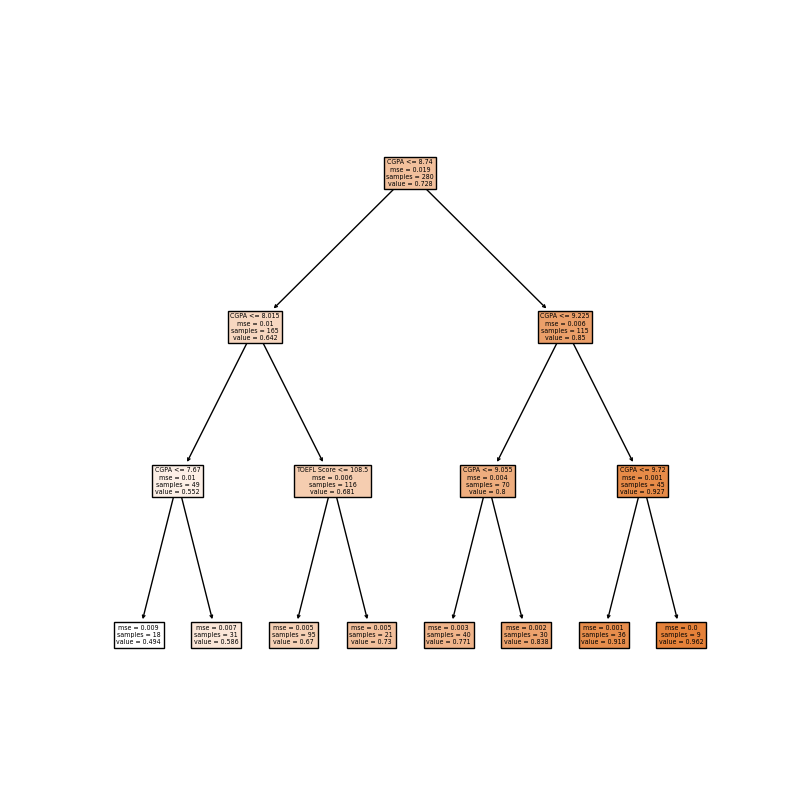

In [58]:
# Árvore de decisão

plt.figure(figsize=(8,8))
tree.plot_tree(Adr, feature_names=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research'], filled=True)

plt.show()

Com isso, o modelo foi validado com os dados reais.

<IPython.core.display.Javascript object>


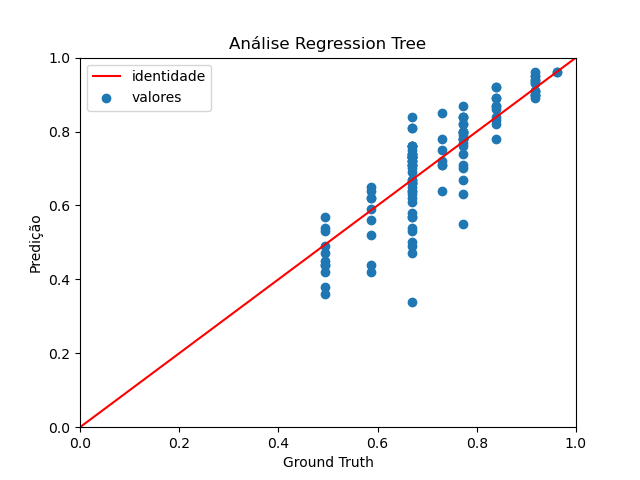

In [62]:
plt.figure()

plt.scatter(Y_Ar, Y_test, label='valores')
plt.plot([0,1],[0,1],'r',label='identidade')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('Ground Truth')
plt.ylabel('Predição')
plt.legend()
plt.title('Análise Regression Tree')

plt.show()

In [63]:
rmse = np.mean((Y_test-Y_Ar)**2)**0.5
R2 = metrics.r2_score(Y_test, Y_Ar) # Avalia R2 da árvore de decisão

print(R2)
print(rmse)

0.7315331943881513
0.07827367753881496
